# Association Assignment

# Problem statement 1:

Prepare rules for the all the data sets 

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 

(data=book.csv)

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\Association assignment

17-01-2023  23:31    <DIR>          .
17-01-2023  23:31    <DIR>          ..
17-01-2023  23:32    <DIR>          .ipynb_checkpoints
17-01-2023  23:03         1,057,365 Association Rules Assignment.ipynb
13-01-2023  18:00            46,094 book.csv
13-01-2023  18:00               767 my_movies.csv
13-01-2023  18:00               274 Problem_Statment.txt
               4 File(s)      1,104,500 bytes
               3 Dir(s)  120,379,613,184 bytes free


## Reading file

In [3]:
book = pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## EDA

In [4]:
book.shape

(2000, 11)

In [5]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
book.duplicated().sum()

1680

In [8]:
book.value_counts()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  ItalAtlas  ItalArt  Florence
0         0         0        0         0       0       0        0         0          0        0           421
1         0         0        0         0       0       0        0         0          0        0           136
0         0         1        0         0       0       0        0         0          0        0           133
                    0        1         0       0       0        0         0          0        0            67
                             0         0       0       0        0         0          0        1            58
                                                                                                         ... 
1         0         1        1         1       1       0        0         1          1        1             1
0         0         1        1         1       1       1        0         0          0        0             1
1         0      

In [9]:
for i in book.columns:
    print(i)
    print(book[i].value_counts())
    print()

ChildBks
0    1154
1     846
Name: ChildBks, dtype: int64

YouthBks
0    1505
1     495
Name: YouthBks, dtype: int64

CookBks
0    1138
1     862
Name: CookBks, dtype: int64

DoItYBks
0    1436
1     564
Name: DoItYBks, dtype: int64

RefBks
0    1571
1     429
Name: RefBks, dtype: int64

ArtBks
0    1518
1     482
Name: ArtBks, dtype: int64

GeogBks
0    1448
1     552
Name: GeogBks, dtype: int64

ItalCook
0    1773
1     227
Name: ItalCook, dtype: int64

ItalAtlas
0    1926
1      74
Name: ItalAtlas, dtype: int64

ItalArt
0    1903
1      97
Name: ItalArt, dtype: int64

Florence
0    1783
1     217
Name: Florence, dtype: int64



In [10]:
# Counting books
count = book.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [11]:
# Top 10 Popular items
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


In [12]:
# Correlation 
corr = book.corr()
corr

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
ChildBks,1.000000,0.282861,0.301188,0.291107,0.299654,0.286600,0.354335,0.236039,0.137784,0.145903,0.016951
YouthBks,0.282861,1.000000,0.258884,0.235362,0.245061,0.224043,0.270534,0.225789,0.102410,0.118612,-0.010086
CookBks,0.301188,0.258884,1.000000,0.295996,0.295417,0.298061,0.332222,0.411127,0.134288,0.188908,0.004782
DoItYBks,0.291107,0.235362,0.295996,1.000000,0.243694,0.288585,0.271783,0.185612,0.100850,0.168864,0.006452
RefBks,0.299654,0.245061,0.295417,0.243694,1.000000,0.215347,0.279570,0.170150,0.375100,0.108833,0.060525
ArtBks,0.286600,0.224043,0.298061,0.288585,0.215347,1.000000,0.318979,0.214842,0.112509,0.400663,0.168036
GeogBks,0.354335,0.270534,0.332222,0.271783,0.279570,0.318979,1.000000,0.230431,0.121925,0.167805,0.090299
ItalCook,0.236039,0.225789,0.411127,0.185612,0.170150,0.214842,0.230431,1.000000,0.313992,0.469540,0.052560
ItalAtlas,0.137784,0.102410,0.134288,0.100850,0.375100,0.112509,0.121925,0.313992,1.000000,0.362652,0.042337
ItalArt,0.145903,0.118612,0.188908,0.168864,0.108833,0.400663,0.167805,0.469540,0.362652,1.000000,0.108331


## Visualization

<AxesSubplot:>

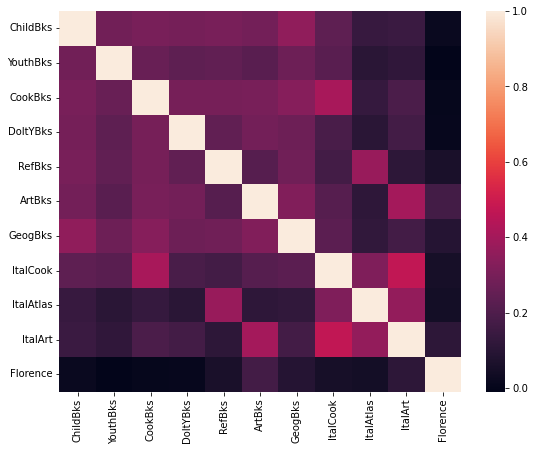

In [13]:
# heatmap
plt.figure(figsize=(9,7))
sns.heatmap(corr)

<Figure size 720x720 with 0 Axes>

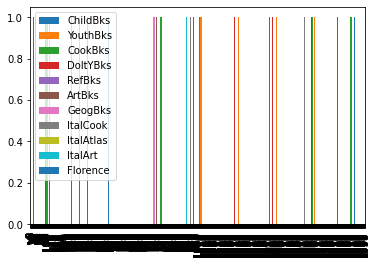

In [14]:
# Plotting bar chart
plt.figure(figsize=(10,10))
book.plot.bar()
plt.show()

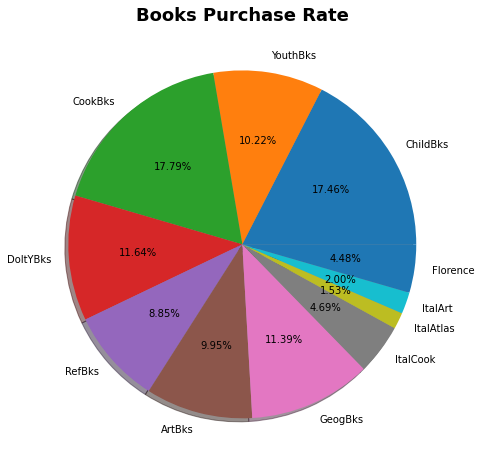

In [290]:
# Pie chart
plt.figure(figsize = (12,8))
plt.pie(book.sum(),labels=book.columns,autopct= '%.2f%%',shadow= True)
plt.title("Books Purchase Rate", fontsize = 18, fontweight = 'bold')
plt.show()

## Apriori Algorith

### 1.Association Rule with 9% support and 60% of confidence Interval

In [291]:
# With 20% Support
frequent_itemsets1=apriori(book,min_support=0.09,use_colnames=True)
frequent_itemsets1.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [292]:
# with 60% confidence
rules1=association_rules(frequent_itemsets,metric='lift',min_threshold=0.6)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


In [293]:
# sorting values of rules1
rules1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
32,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
26,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
27,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
24,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
29,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
25,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
28,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
34,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
31,"(GeogBks, CookBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


In [294]:
# Lift ratio > 1 is good influencial rule in selecting associated transaction
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


Leverage near to zero shows independence.

### Visulization of obtained rule

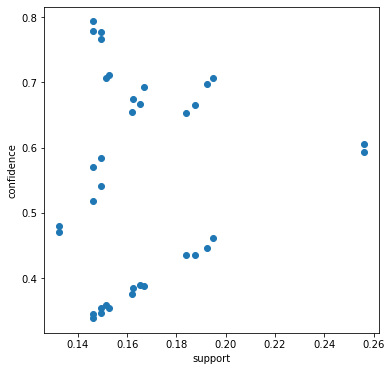

In [295]:
# Plotting scatter plot
plt.figure(figsize=(6,6))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

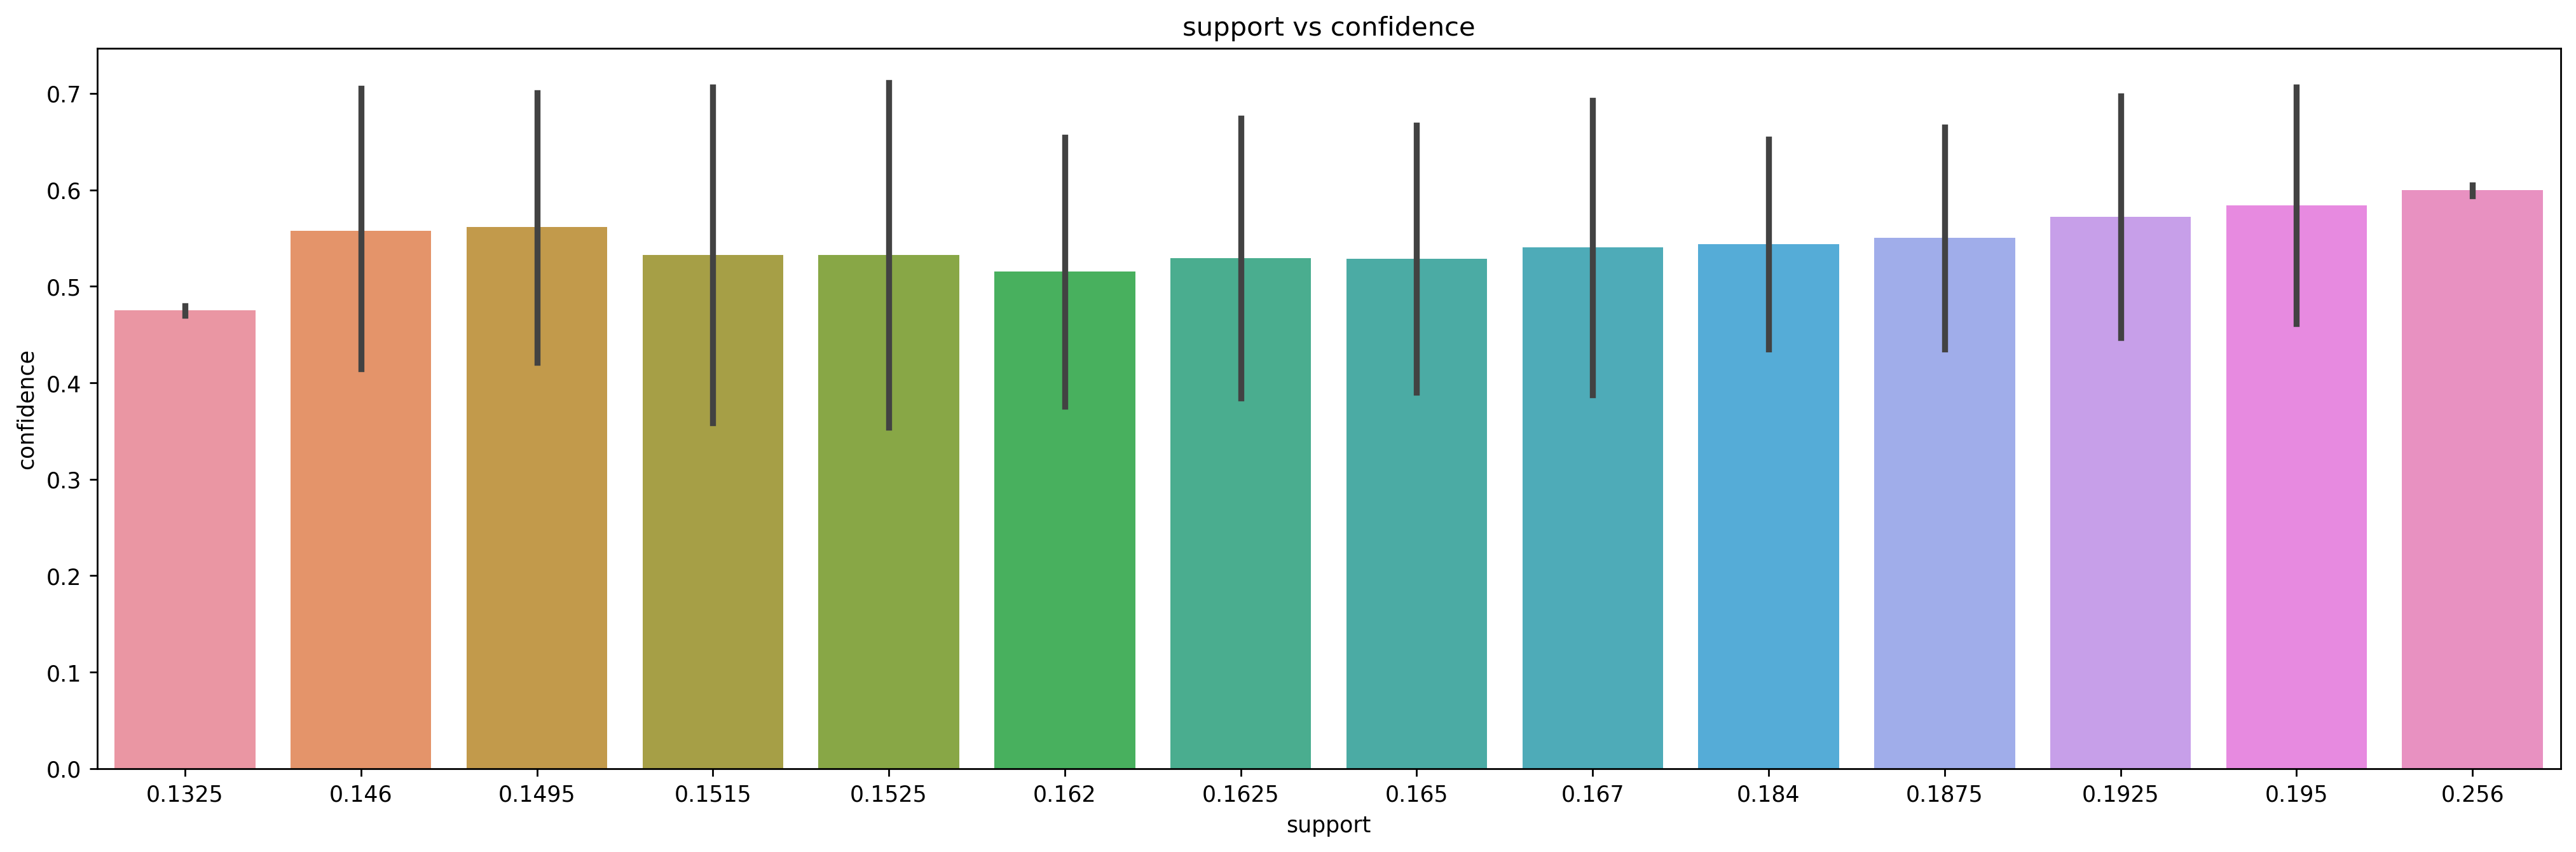

In [296]:
# Bar chart 
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rules1)
plt.title("support vs confidence")
plt.show

## 2.Association Rules with 13% and confidence interval of 70%

In [297]:
# With 13% Support
frequent_itemsets2=apriori(book,min_support=0.13,use_colnames=True)
frequent_itemsets2.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [298]:
# with 70% confidence
rules2=association_rules(frequent_itemsets,metric='lift',min_threshold=0.7)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


In [299]:
# sorting values of rules2
rules2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
32,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
26,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
27,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
24,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
29,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
25,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
28,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
34,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
31,"(GeogBks, CookBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


In [300]:
# Lift ratio > 1 shows good influencal rule in selecting the associated transaction
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


### Visualization of Obtained Rule

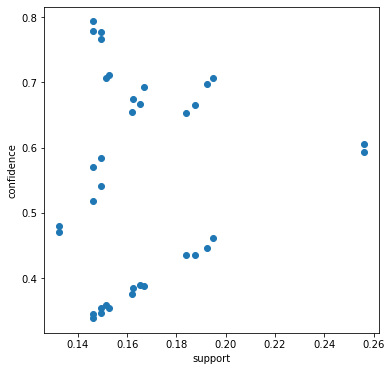

In [301]:
# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

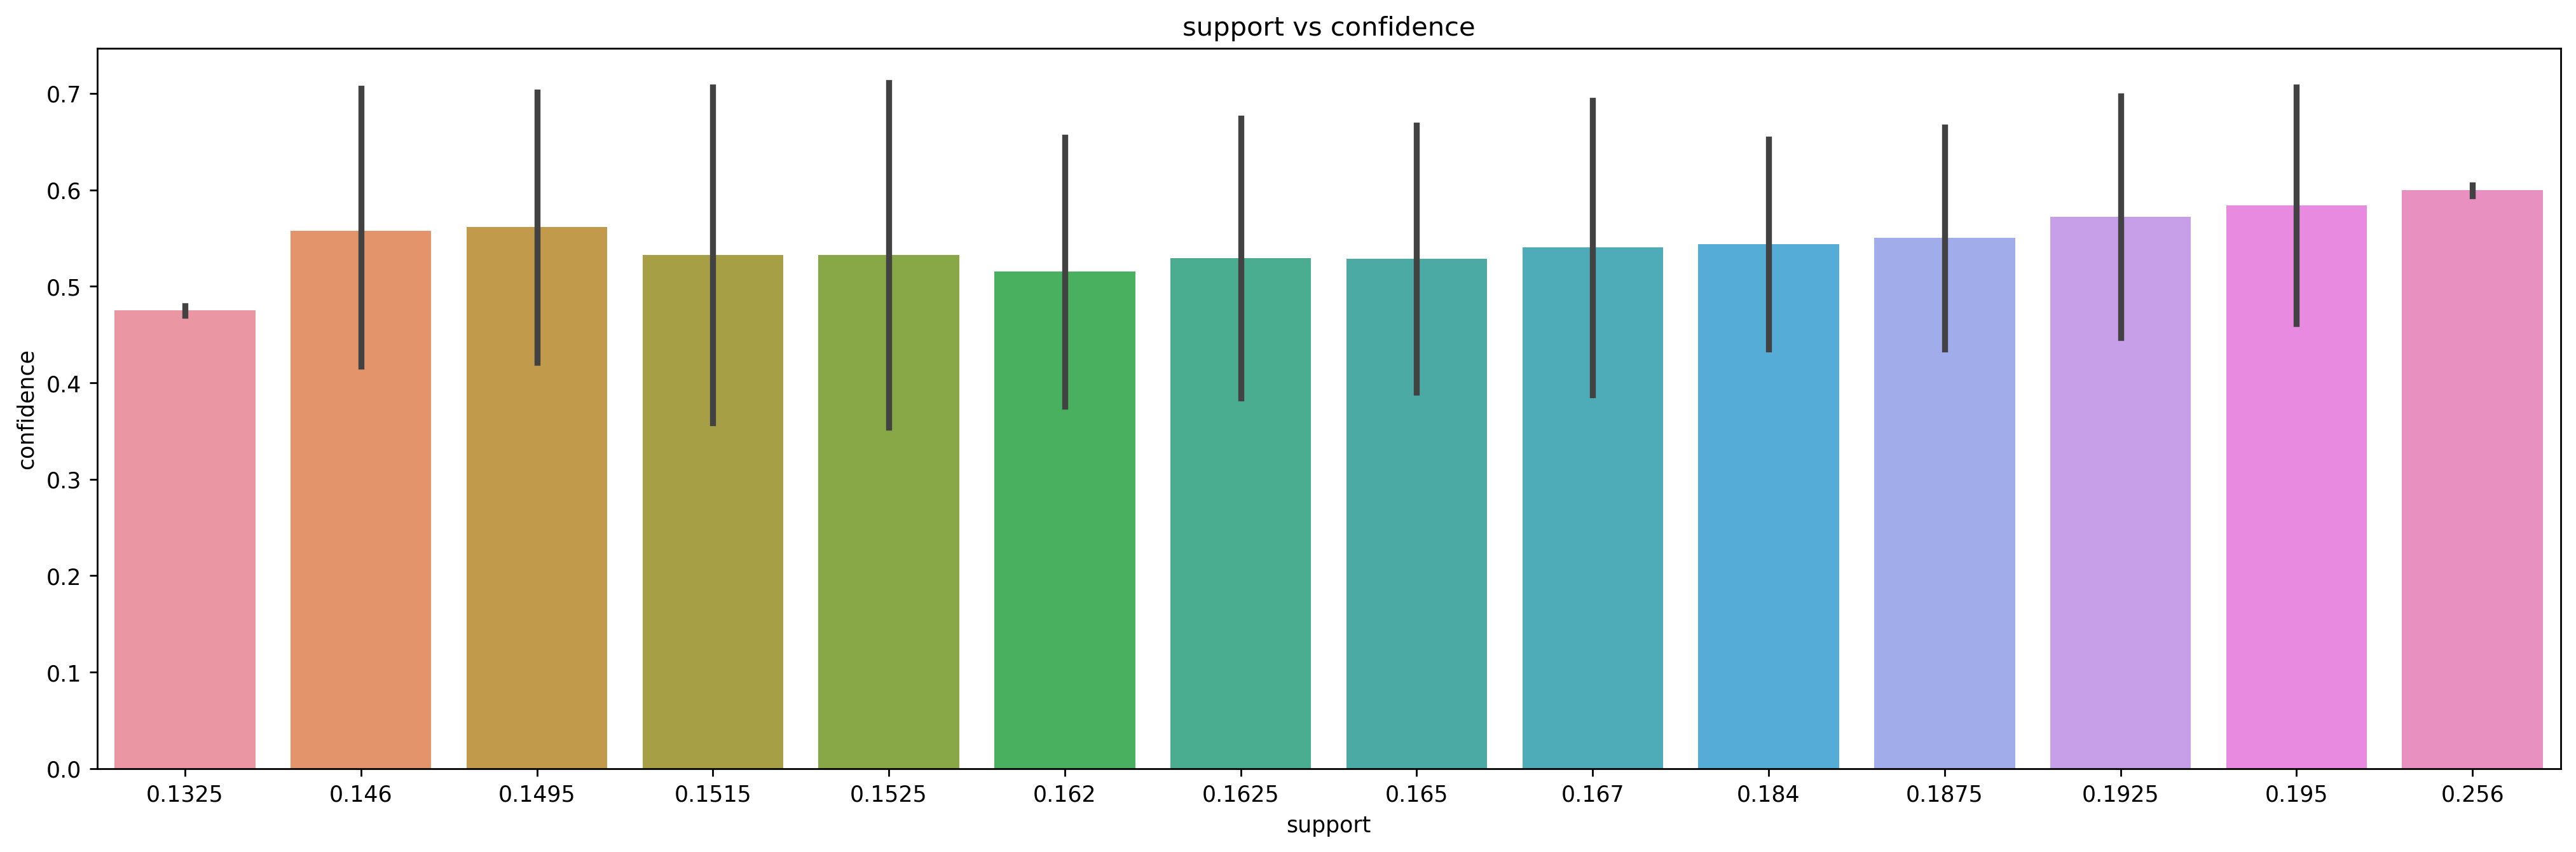

In [302]:
# Bar chart 
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rules2)
plt.title("support vs confidence")
plt.show

## 3. Association Rule with 20% support and 90% confidence interval

In [303]:
# With 20% Support
frequent_itemsets3=apriori(book,min_support=0.20,use_colnames=True)
frequent_itemsets3.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [304]:
# with 90% confidence
rules3=association_rules(frequent_itemsets,metric='lift',min_threshold=0.75)
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


In [305]:
# Sort Values of rules3
rules3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
32,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
26,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
27,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
24,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
29,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
25,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
28,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
34,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
31,"(GeogBks, CookBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


In [306]:
# Lift ratio > 1 is good influencial rule in selecting associated transaction
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


### Visualization of Obtained Rule

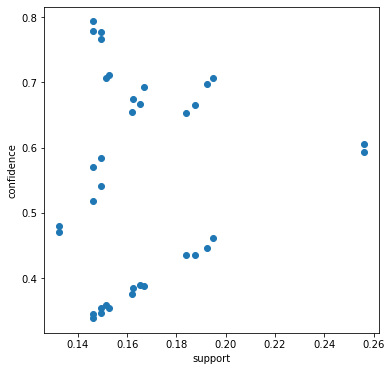

In [307]:
# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

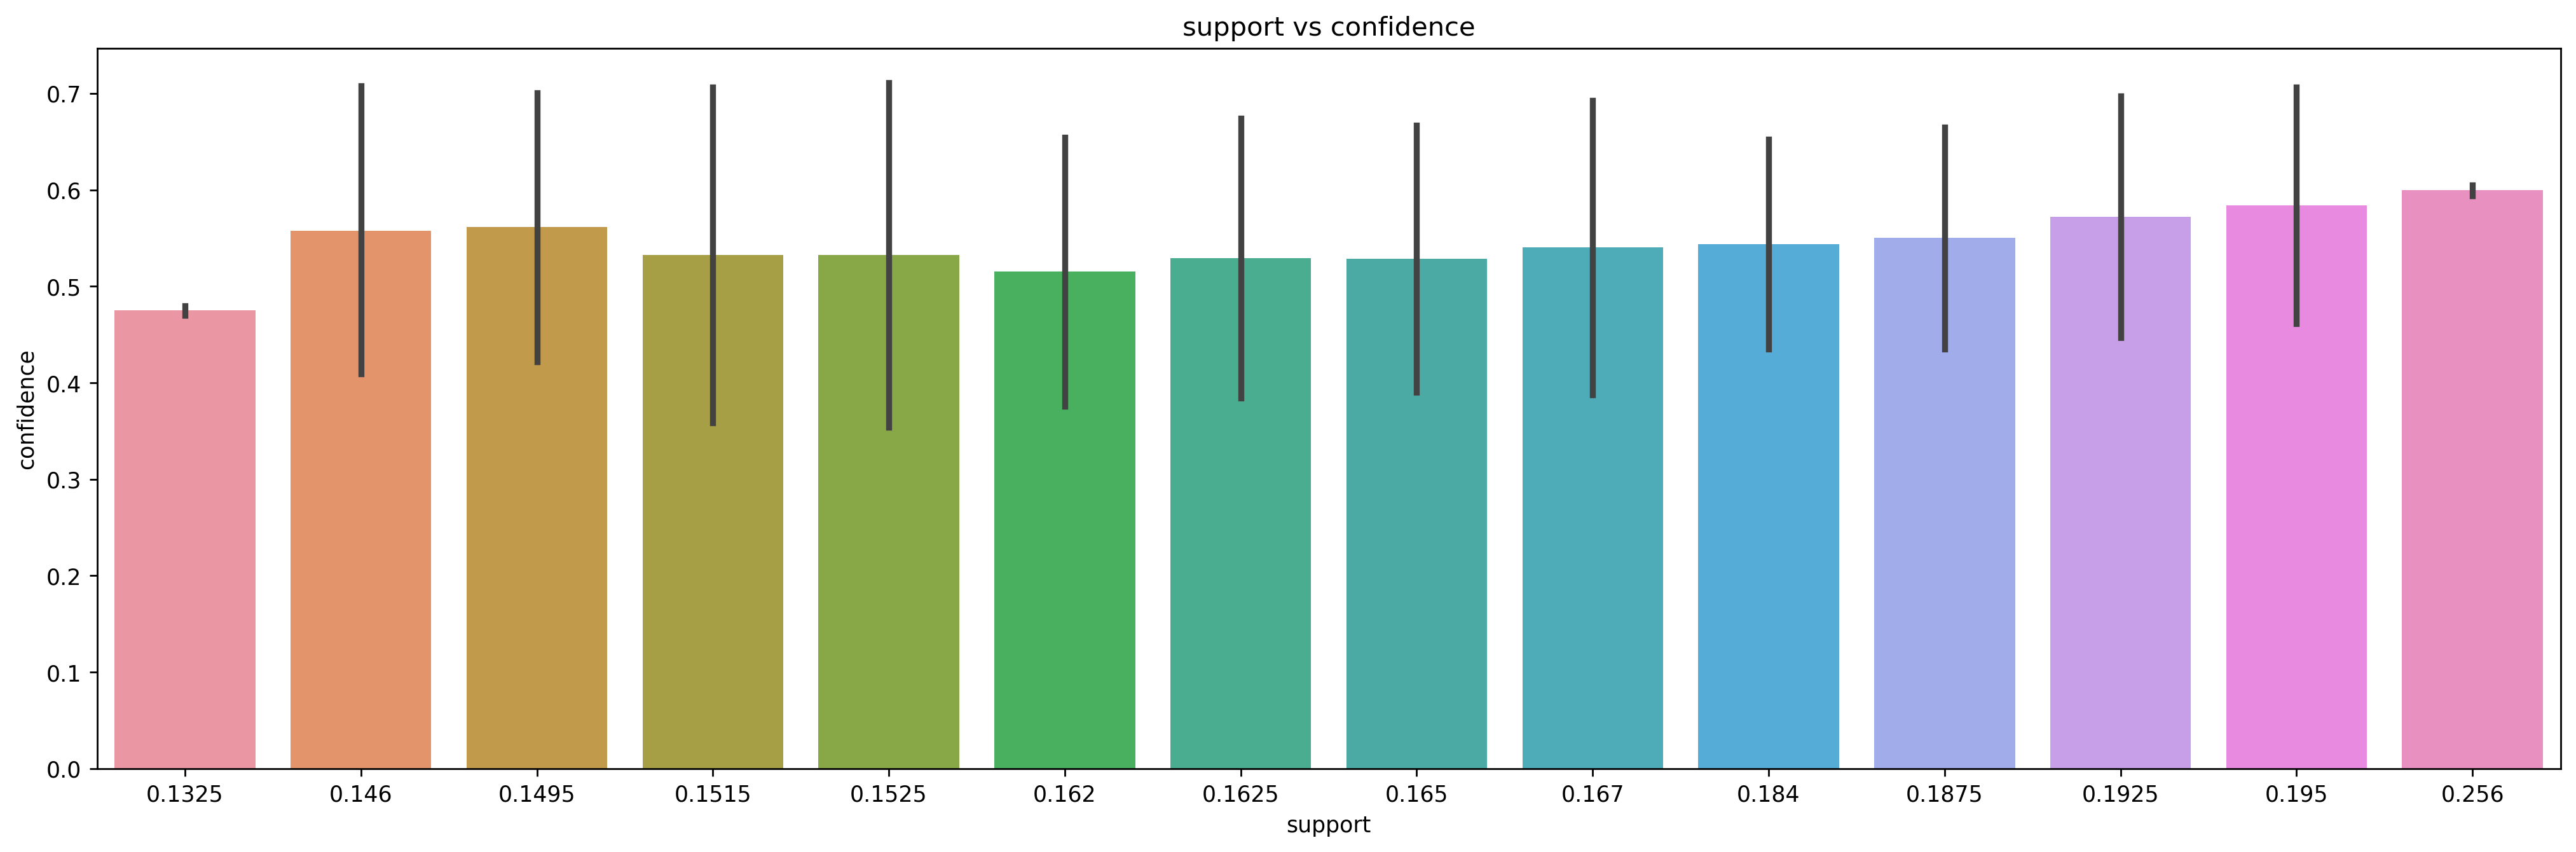

In [308]:
# Bar chart 
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rules3)
plt.title("support vs confidence")
plt.show

# Problem Statement 2:

Prepare rules for the all the data sets

1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots

(data=my_movies.csv)

In [346]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\Association assignment

17-01-2023  23:01    <DIR>          .
17-01-2023  23:01    <DIR>          ..
17-01-2023  19:44    <DIR>          .ipynb_checkpoints
17-01-2023  19:42           237,713 Association assignment.ipynb
13-01-2023  18:00            46,094 book.csv
13-01-2023  18:00               767 my_movies.csv
13-01-2023  18:00               274 Problem_Statment.txt
17-01-2023  23:01         1,058,851 Untitled.ipynb
               5 File(s)      1,343,699 bytes
               3 Dir(s)  123,311,542,272 bytes free


## Reading file

In [347]:
movies= pd.read_csv('my_movies.csv')
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


## EDA

In [348]:
movies.shape

(10, 15)

In [349]:
movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [350]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [351]:
movies.duplicated().sum()

3

In [352]:
# Data Preprocessing
movies.drop(['V1','V2','V3','V4','V5'],axis=1,inplace=True)
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [353]:
movies.value_counts()

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  Braveheart  Green Mile
1            1          0      0              1        0      0              0     0           0             4
0            0          0      1              0        0      1              0     0           0             1
                        1      0              0        1      0              0     0           0             1
             1          0      0              1        0      0              0     0           0             1
                                                                                   1           0             1
1            0          1      1              0        1      0              0     0           1             1
             1          0      0              0        0      0              1     0           1             1
dtype: int64

In [354]:
for i in movies.columns:
    print(i)
    print(movies[i].value_counts())
    print()

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64

Gladiator
1    7
0    3
Name: Gladiator, dtype: int64

LOTR1
0    8
1    2
Name: LOTR1, dtype: int64

Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64

Patriot
1    6
0    4
Name: Patriot, dtype: int64

LOTR2
0    8
1    2
Name: LOTR2, dtype: int64

Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64

LOTR
0    9
1    1
Name: LOTR, dtype: int64

Braveheart
0    9
1    1
Name: Braveheart, dtype: int64

Green Mile
0    8
1    2
Name: Green Mile, dtype: int64



In [355]:
count = movies.loc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

In [356]:
# Top 10 populqr items
count.sort_values(0,ascending=False,inplace=True)
count=count.to_frame().reset_index()
count=count.rename(columns={'index':'items',0:'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


In [357]:
corr = movies.corr()
corr

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
Sixth Sense,1.000000,0.356348,-0.102062,-0.102062,0.166667,-0.102062,-0.408248,0.272166,-0.408248,0.408248
Gladiator,0.356348,1.000000,-0.763763,-0.763763,0.801784,-0.763763,-0.509175,0.218218,0.218218,-0.218218
LOTR1,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter1,-0.102062,-0.763763,0.375000,1.000000,-0.612372,0.375000,0.666667,-0.166667,-0.166667,0.375000
Patriot,0.166667,0.801784,-0.612372,-0.612372,1.000000,-0.612372,-0.408248,-0.408248,0.272166,-0.612372
LOTR2,-0.102062,-0.763763,1.000000,0.375000,-0.612372,1.000000,-0.166667,-0.166667,-0.166667,0.375000
Harry Potter2,-0.408248,-0.509175,-0.166667,0.666667,-0.408248,-0.166667,1.000000,-0.111111,-0.111111,-0.166667
LOTR,0.272166,0.218218,-0.166667,-0.166667,-0.408248,-0.166667,-0.111111,1.000000,-0.111111,0.666667
Braveheart,-0.408248,0.218218,-0.166667,-0.166667,0.272166,-0.166667,-0.111111,-0.111111,1.000000,-0.166667
Green Mile,0.408248,-0.218218,0.375000,0.375000,-0.612372,0.375000,-0.166667,0.666667,-0.166667,1.000000


## Visualization

<AxesSubplot:>

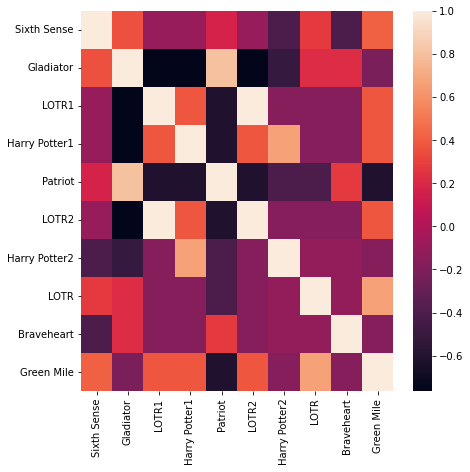

In [358]:
plt.figure(figsize=(7,7))
sns.heatmap(corr)

<Figure size 720x720 with 0 Axes>

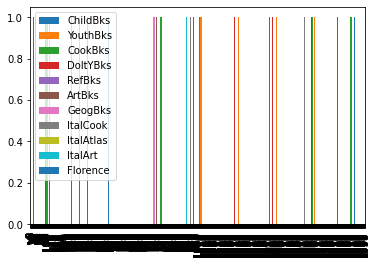

In [359]:
# Plotting bar chart
plt.figure(figsize=(10,10))
book.plot.bar()
plt.show()

## Apriori Algorithm

### 1. Association Rule for support 10% and confidence 80% 

In [360]:
# With 10% Support
frequent_itemsets1=apriori(book,min_support=0.1,use_colnames=True)
frequent_itemsets1.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [361]:
# with 80% confidence
rules1=association_rules(frequent_itemsets,metric='lift',min_threshold=0.80)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


In [362]:
# sorting values for rule1
rules1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
32,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
26,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
27,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
24,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
29,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
25,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
28,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
34,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
31,"(GeogBks, CookBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


In [363]:
# Lift ratio > 1 is good influencial rule in selecting associated transaction
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


### Visualization of obtained rules

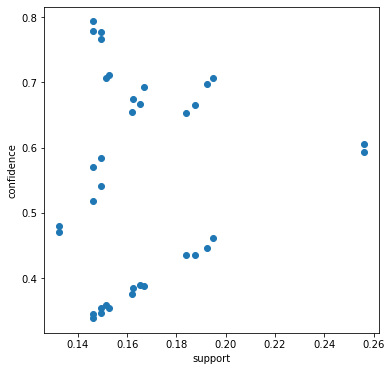

In [364]:
# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

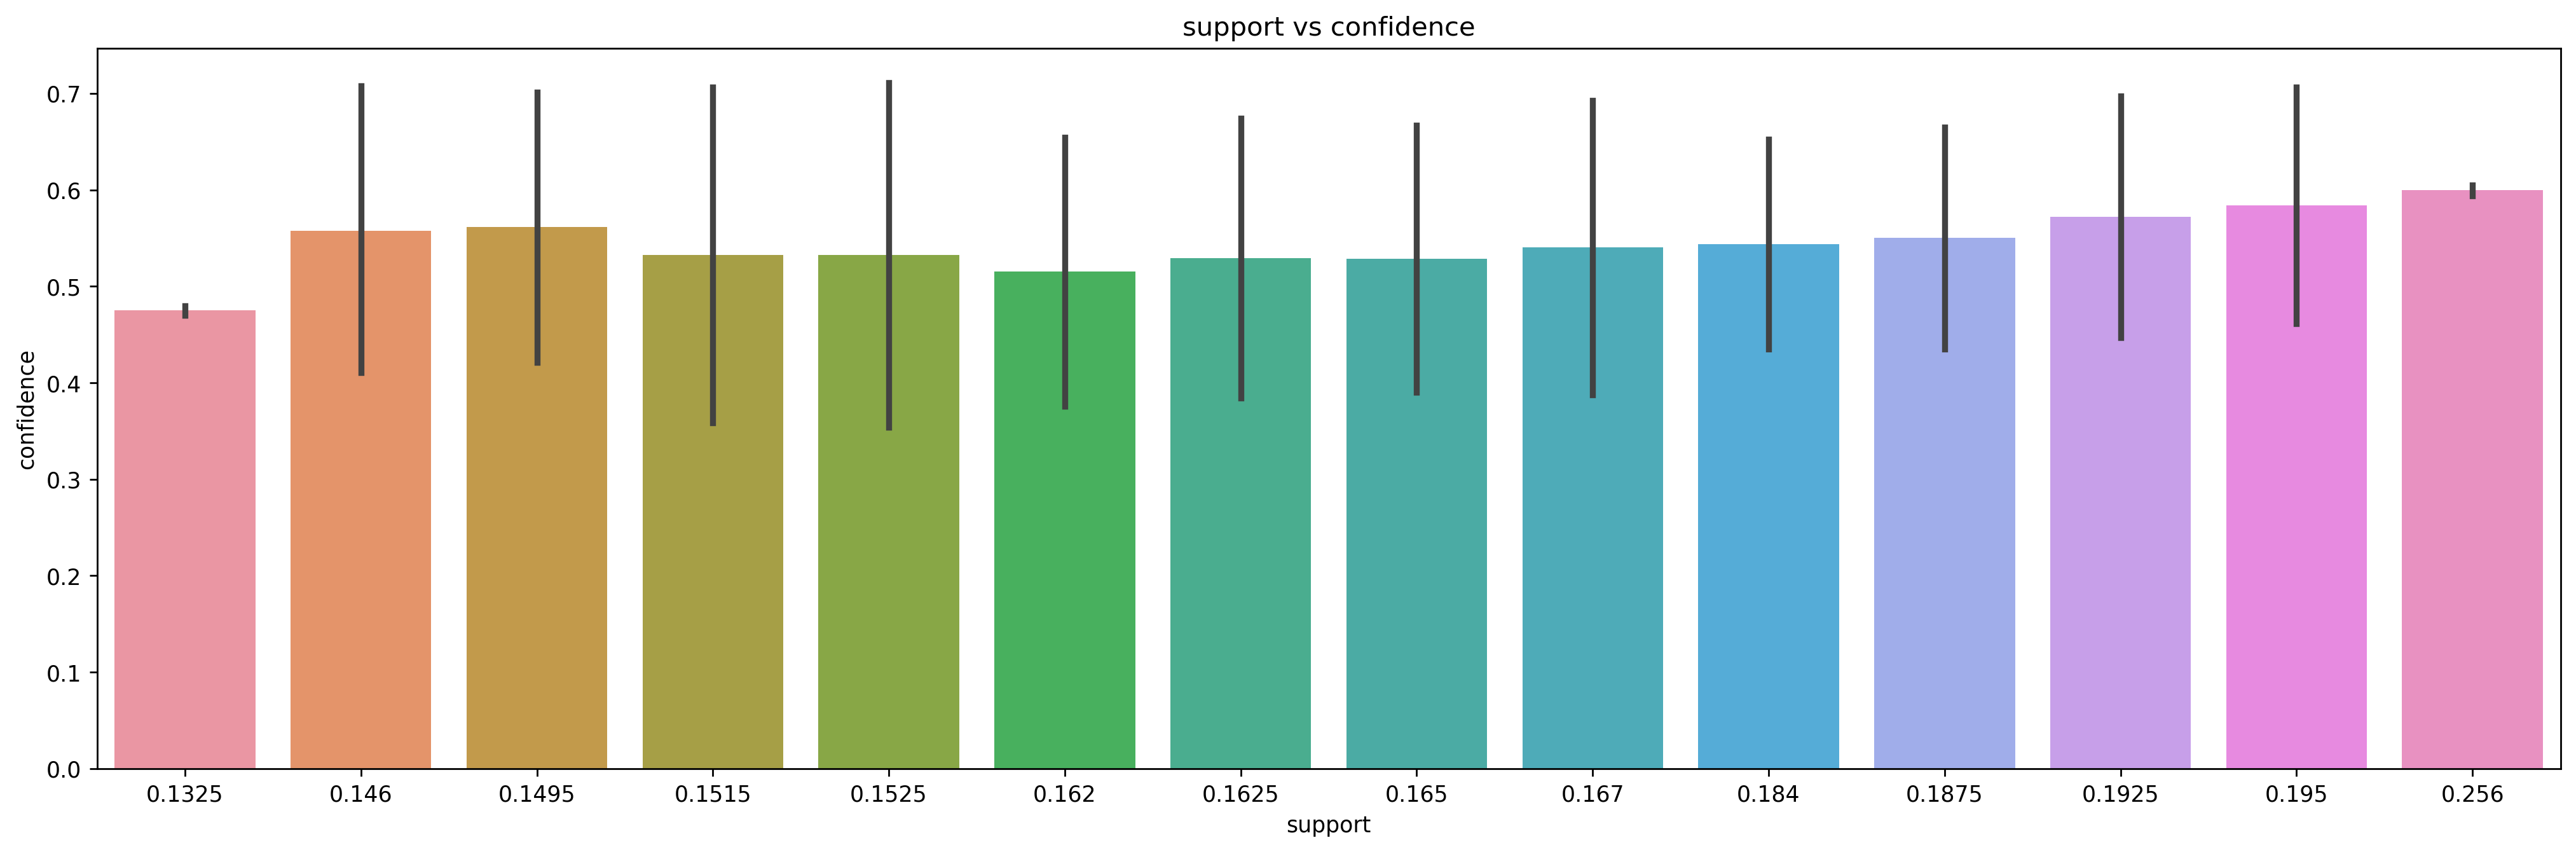

In [365]:
# Bar chart 
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rules1)
plt.title("support vs confidence")
plt.show

## 2. Association Rule with support of 5% and confidence of 70%

In [366]:
# With 5% Support
frequent_itemsets2=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets2.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [367]:
# with 70% confidence
rules2=association_rules(frequent_itemsets,metric='lift',min_threshold=0.70)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


In [368]:
# Sorting values of rule2
rules2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
32,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
26,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
27,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
24,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
29,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
25,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
28,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
34,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
31,"(GeogBks, CookBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


In [369]:
# Lift ratio > 1 is good influencial rule in selecting associated transaction
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


## Visualization of Obtained Rules

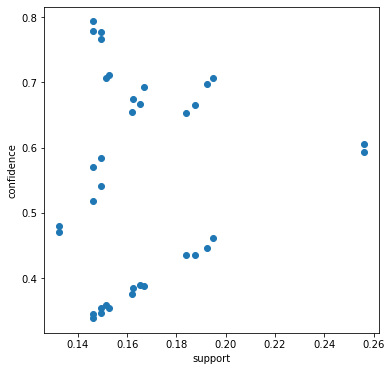

In [370]:
# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

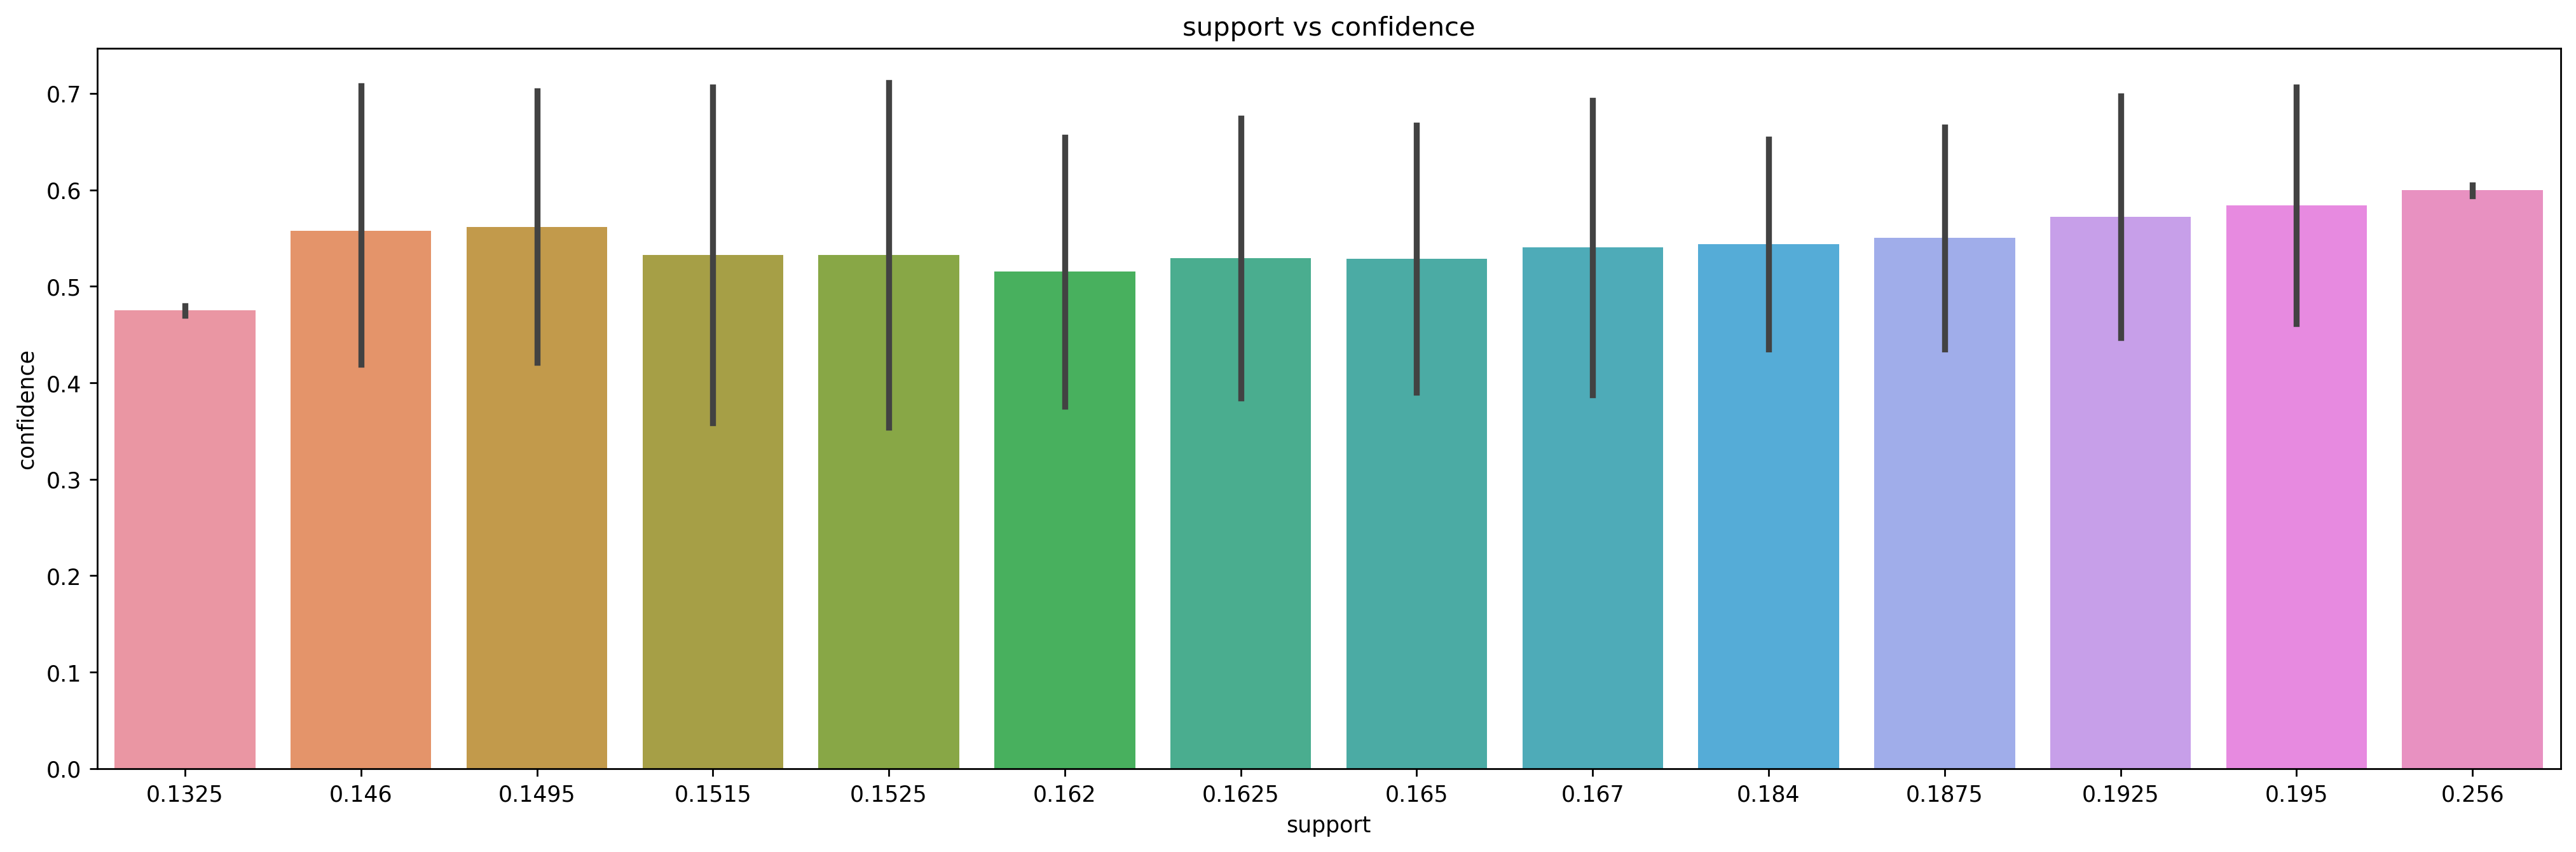

In [371]:
# Bar chart 
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rules2)
plt.title("support vs confidence")
plt.show

## 3. Association Rule with support 15% and confidence 95%

In [372]:
# With 15% Support
frequent_itemsets3=apriori(book,min_support=0.15,use_colnames=True)
frequent_itemsets3.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [373]:
# with 95% confidence
rules3=association_rules(frequent_itemsets,metric='lift',min_threshold=0.95)
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770


In [374]:
# Sort values of rules3
rules3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273
32,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
26,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
27,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
24,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
29,(CookBks),"(ChildBks, DoItYBks)",0.4310,0.1840,0.1460,0.338747,1.841017,0.066696,1.234021
25,"(CookBks, DoItYBks)",(ChildBks),0.1875,0.4230,0.1460,0.778667,1.840820,0.066687,2.606928
28,(ChildBks),"(CookBks, DoItYBks)",0.4230,0.1875,0.1460,0.345154,1.840820,0.066687,1.240749
34,(ChildBks),"(GeogBks, CookBks)",0.4230,0.1925,0.1495,0.353428,1.835989,0.068072,1.248894
31,"(GeogBks, CookBks)",(ChildBks),0.1925,0.4230,0.1495,0.776623,1.835989,0.068072,2.583081


In [375]:
#Lift ratio > 1 is good influencial rule in selecting associated transaction
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


### Visualization of Obtained Rules

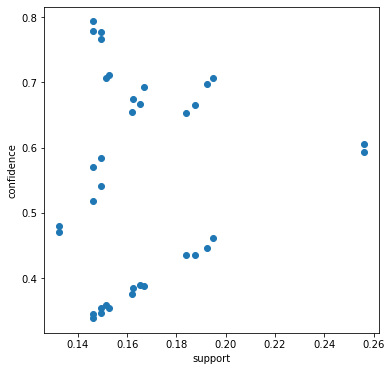

In [376]:
# Scatter Plot
plt.figure(figsize=(6,6))
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

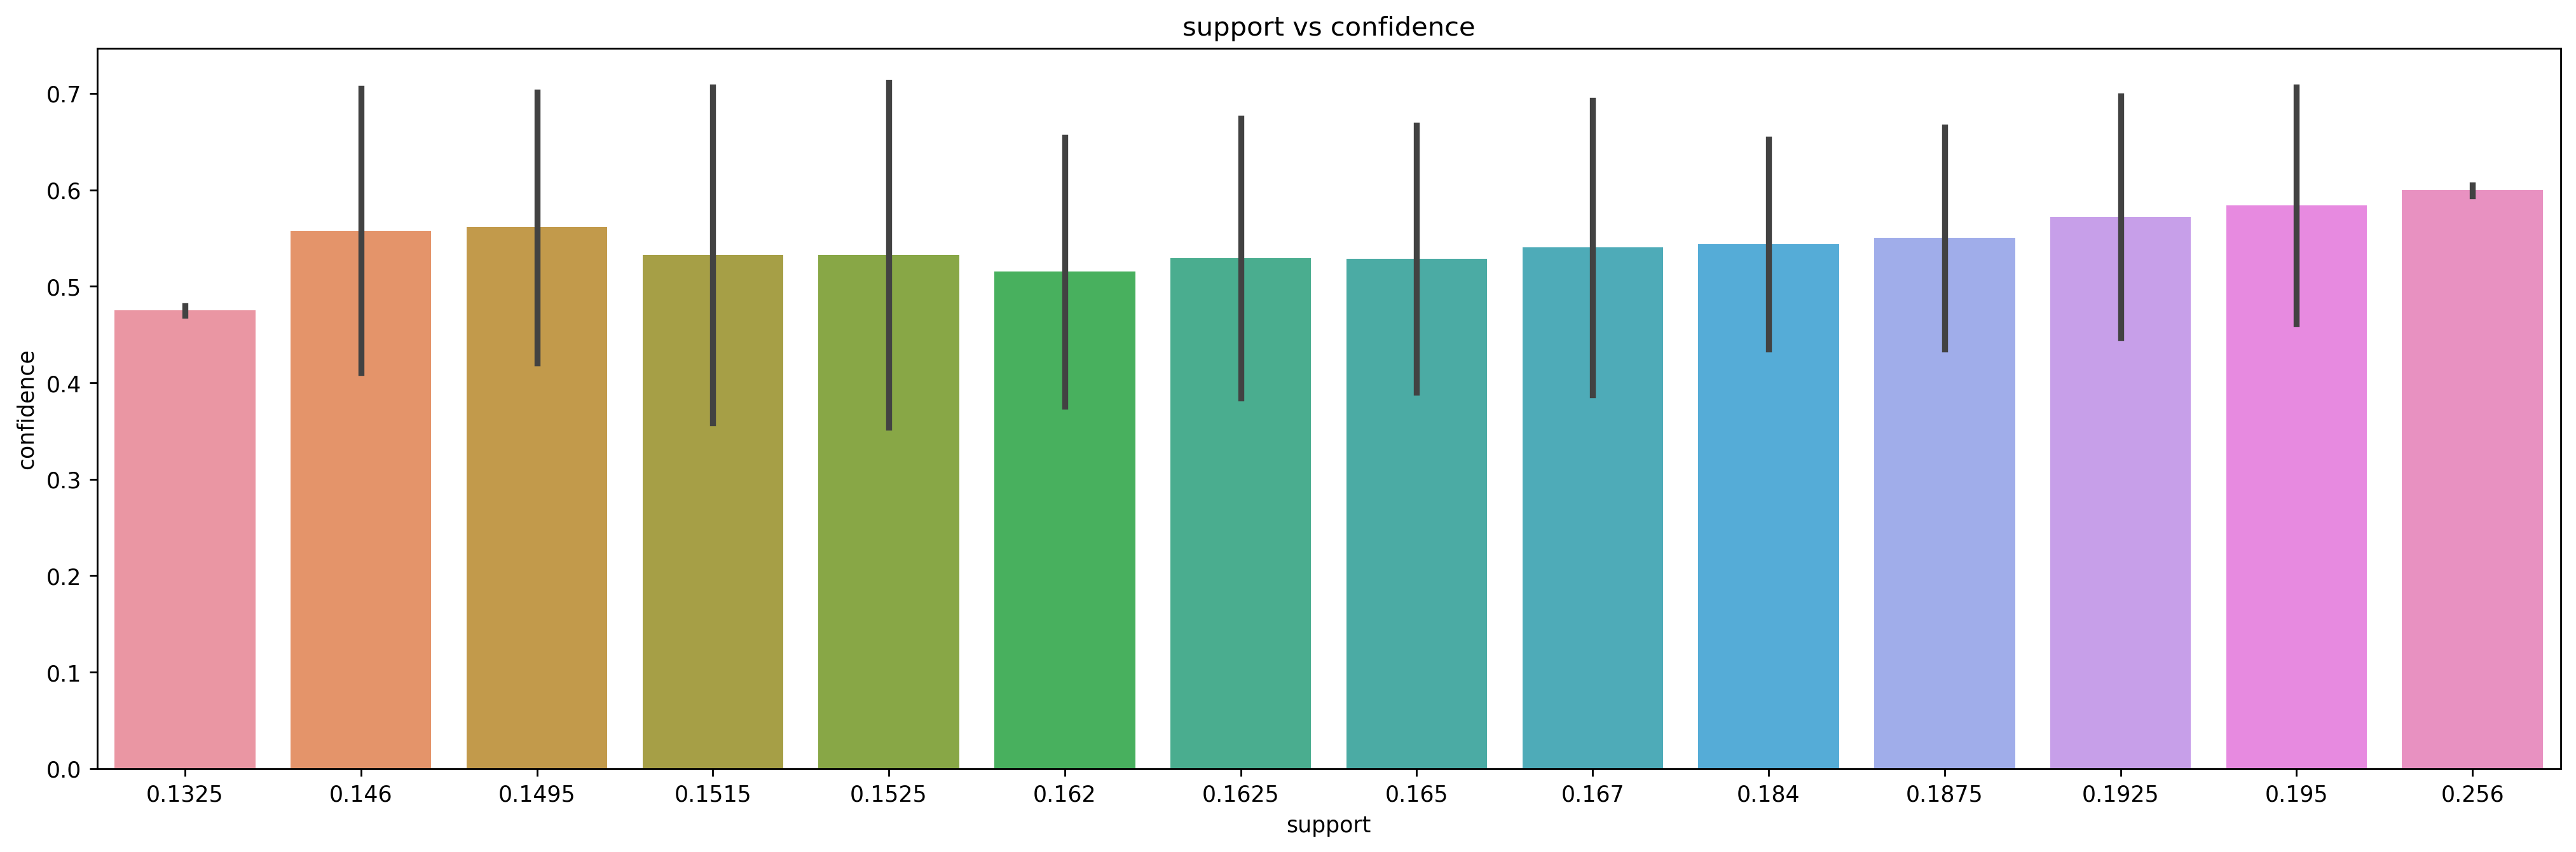

In [377]:
# Bar chart 
plt.figure(figsize=(20,6),dpi=250)
sns.barplot("support","confidence",data=rules3)
plt.title("support vs confidence")
plt.show